In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path


proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

print(proj_root)

d:\Work\repos\RL\phd-rl-algos


In [3]:
import numpy as np
from rl_envs_forge.envs.network_graph.network_graph import NetworkGraph

from dqn.opinion_dynamics.utils.experiment import build_environment

from dynamic_programming.opinion_dynamics.algos import compute_average_error, compute_final_average_error, generate_full_control_policy
from dynamic_programming.opinion_dynamics.algo_infinite_horizon import value_iteration, extract_policy, create_state_grid
from dynamic_programming.opinion_dynamics.common.viz import plot_opinions_over_time, visualize_policy_from_env


In [4]:

def run_policy(env, policy, nx, step_duration, max_steps=1000):
    """
    Run the simulation using a given policy with a maximum number of steps.

    Args:
        env: The environment with network properties.
        policy: The control policy to be used.
        nx: Number of grid points per dimension (used for mapping states to grid indices).
        step_duration: Duration of each policy application.
        tolerance: Tolerance for the mean opinion to stop the simulation.
        max_steps: Maximum number of steps to run.

    Returns:
        opinions_over_time: Array of opinions over the entire simulation.
        time_points: Corresponding time points for each opinion snapshot.
        rewards_over_time: Collected rewards at each step.
    """
    N = env.num_agents
    time_points = []
    rewards_over_time = []
    current_time = 0.0
    state, _ = env.reset()
    opinions_over_time = [state]
    grids = create_state_grid(N, nx)

    for step in range(max_steps):
        idx = tuple(np.abs(grids[i] - state[i]).argmin() for i in range(N))
        action = policy.get(idx, np.zeros(N))
        
        # print(action)
        next_state, reward, done, truncated, _ = env.step(action, env.tau)
        
        opinions_over_time.append(next_state.copy())
        rewards_over_time.append(reward)
        time_points.append(current_time)
        # print(f"Step: {step}, Time: {current_time}, Reward: {reward}")
        
        current_time += step_duration
        state = next_state

        if done or truncated:
            print(f"Ran for {step} steps: done={done}, truncated={truncated}")
            break
        
    return np.array(opinions_over_time), np.array(time_points), np.array(rewards_over_time)


Ran for 6 steps: done=True, truncated=False


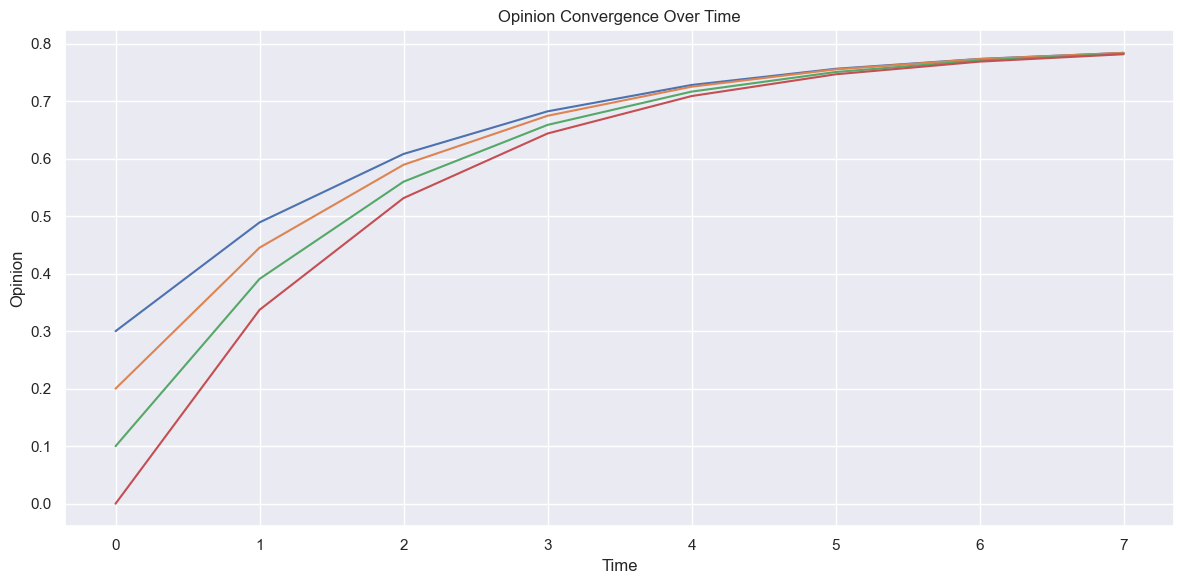

-19.953666515592968

In [ ]:
env = build_environment()
num_steps = 100
nx = 8

policy_broadcast = generate_full_control_policy(env, nx)

opinions_over_time, time_points, rewards = run_policy(env, policy_broadcast, nx=nx, step_duration=env.tau, max_steps=num_steps)
plot_opinions_over_time(opinions_over_time)

# sum(rewards)

gamma = 0.99

total_value = 0
for i, r in enumerate(rewards):
    total_value = total_value + (gamma**i) * r
    
total_value

In [6]:
opinions_over_time

array([[0.3       , 0.2       , 0.1       , 0.        ],
       [0.48912426, 0.44516641, 0.39089255, 0.33709435],
       [0.60813489, 0.58934292, 0.55993322, 0.53143037],
       [0.68226291, 0.67454788, 0.65865381, 0.64373418],
       [0.728077  , 0.7251052 , 0.71654395, 0.70881149],
       [0.75622156, 0.75520155, 0.75060713, 0.74663328],
       [0.77342946, 0.77316398, 0.77070797, 0.76868084],
       [0.78391092, 0.78390619, 0.78259851, 0.78157138]])

In [ ]:
env = build_environment()

# Adjusted parameters
beta = env.control_beta
gamma = 0.99
step_duration = env.tau

V = value_iteration(env, nx=nx, gamma=gamma, beta=beta, step_duration=step_duration)
policy = extract_policy(
    env, V, nx=nx, gamma=gamma, beta=beta, step_duration=step_duration
)
    

Converged in 122 iterations.


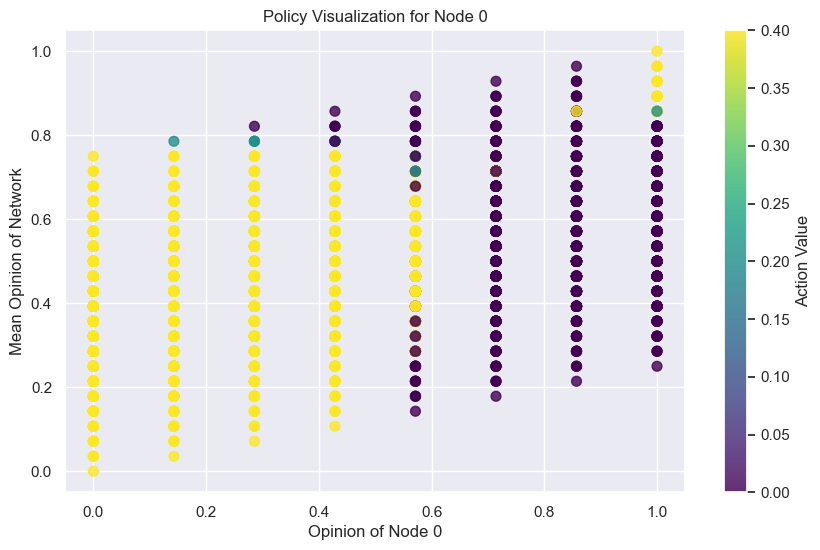

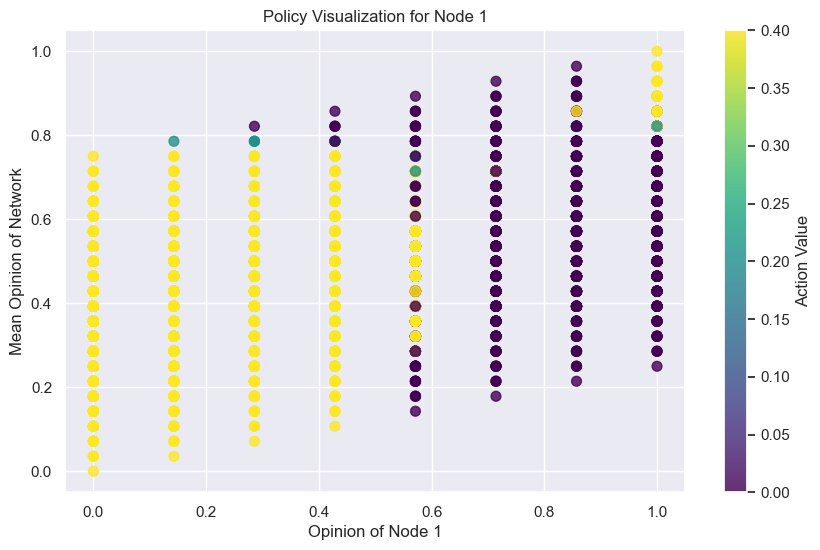

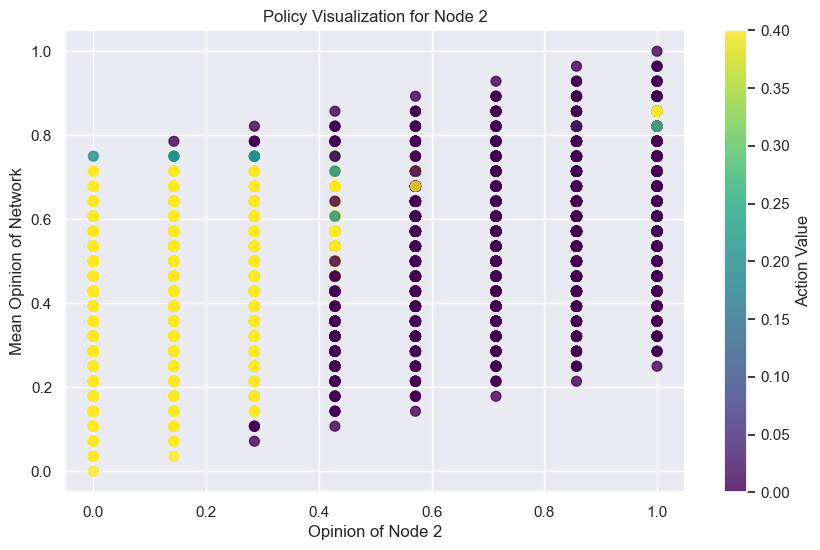

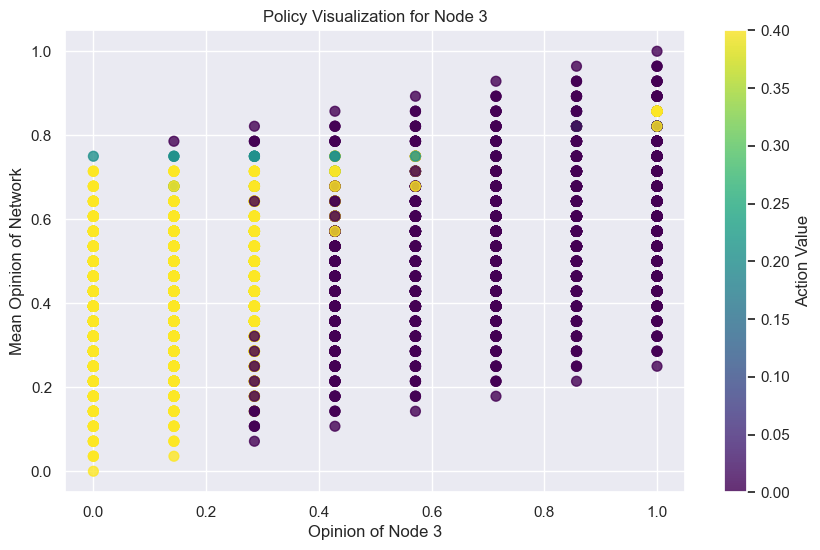

In [8]:
for node_index in range(env.num_agents):
    visualize_policy_from_env(policy, env, nx=nx, node_index=node_index)

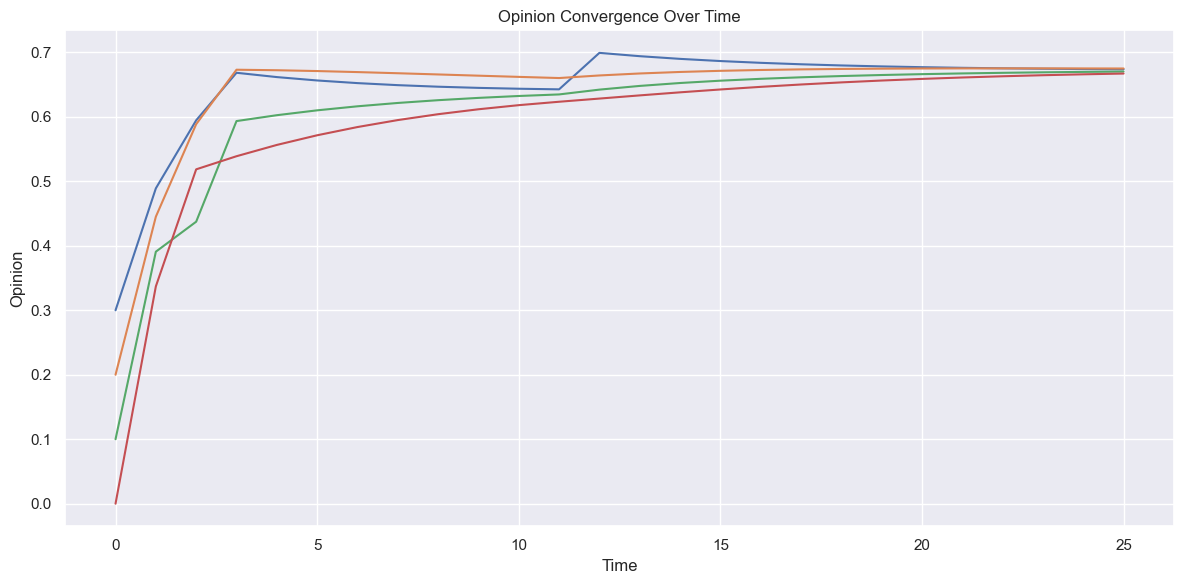

-14.728884608981605

In [9]:
env = build_environment()
num_steps = 25

opinions_over_time, time_points, rewards = run_policy(env, policy, nx=nx, step_duration=env.tau, max_steps=num_steps)
plot_opinions_over_time(opinions_over_time)
# sum(rewards)

total_value = 0
for i, r in enumerate(rewards):
    total_value = total_value + (gamma**i) * r
    
total_value

In [10]:
env.opinions

array([0.67377964, 0.67501086, 0.67030253, 0.66718082])

In [11]:
rewards

array([-4.73772242, -3.46066494, -3.12610487, -0.70694669, -0.69093931,
       -0.67761505, -0.66656917, -0.6574521 , -0.64996264, -0.64384193,
       -0.63886816, -1.36593527, -0.55730198, -0.549858  , -0.54344862,
       -0.53794044, -0.53321735, -0.52917766, -0.52573196, -0.52280156,
       -0.52031714, -0.51821773, -0.51644975, -0.51496625, -0.51372616])